- [Разведочный анализ данных](#Разведочный-анализ-данных)
- [Корреляция](#Корреляция)
- [Хи квадрат](#Хи-квадрат)

In [1]:
import itertools
import os

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

from utils import visualization as viz


DATA_PATH = os.path.join('data', 'bank.xlsx')

ALPHA = 0.05  # фактор значимости

In [2]:
df = pd.read_excel(DATA_PATH)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
numerical_features = [
    'age',
    'balance',
    'day',
    'duration',
    'campaign',
    'pdays',
    'previous',
]

categorical_features = [
    'job',
    'marital',
    'education',
    'contact',
    'month',
    'poutcome',
]

binary_features = [
    'default',
    'housing',
    'loan',
]

# Разведочный анализ данных

- [y](#y)

- [age](#age)
- [job](#job)
- [marital](#marital)
- [education](#education)
- [default](#default)
- [balance](#balance)
- [housing](#housing)
- [loan](#loan)
- [contact](#contact)
- [day](#day)
- [month](#month)
- [duration](#duration)
- [campaign](#campaign)
- [pdays](#pdays)
- [previous](#previous)
- [poutcome](#poutcome)

## y

Выдали ли клиенту кредит.

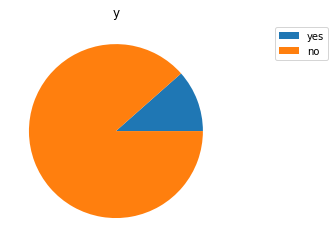

In [4]:
ax = plt.subplot()
ax.set_title('y')
sizes = [(df['y'] == 'yes').sum(), (df['y'] == 'no').sum()]
ax.pie(sizes)
ax.legend(['yes', 'no'], bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

## age

Возраст.

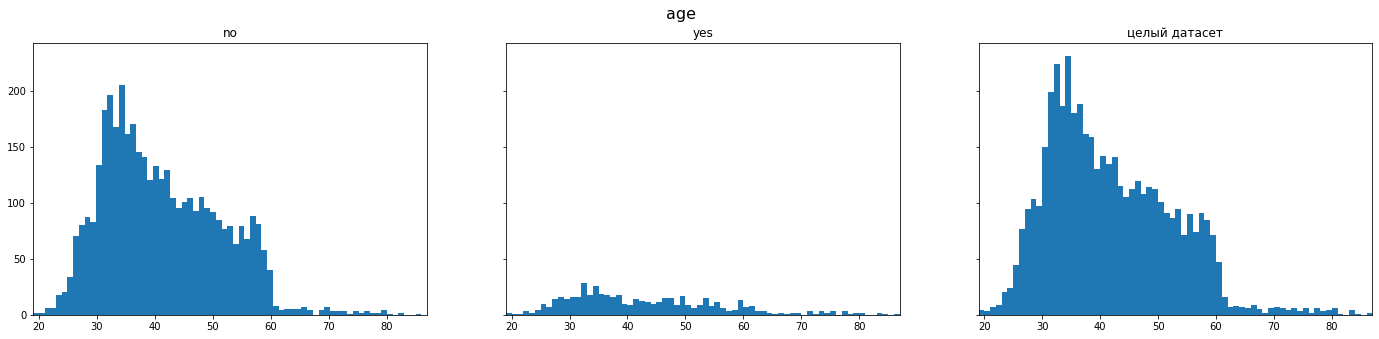

In [5]:
xlim = df['age'].min(), df['age'].max()
bins = int(df['age'].max() - df['age'].min())
viz.plot_hists(df, 'age', 'y', bins=bins, xlim=xlim)

## job

Тип работы.

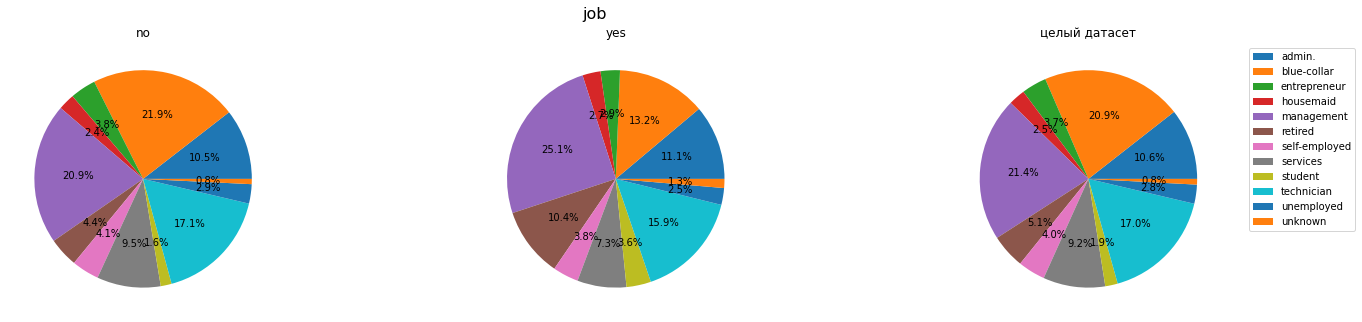

In [6]:
viz.plot_pies(df, 'job', 'y')

## marital

Семейное положение.

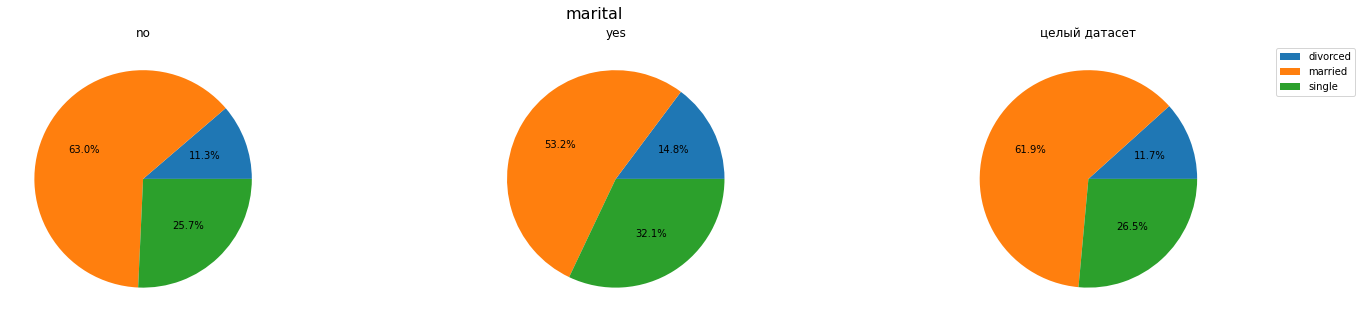

In [7]:
viz.plot_pies(df, 'marital', 'y')

## education

Образование.

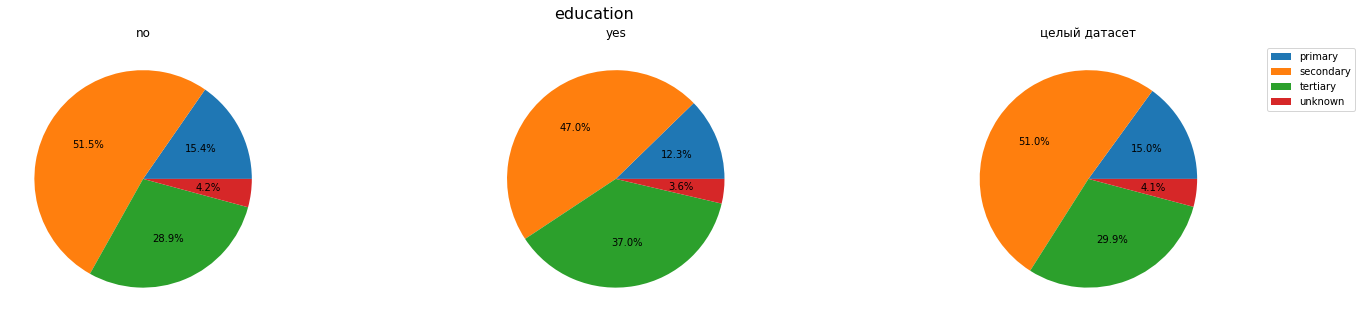

In [8]:
viz.plot_pies(df, 'education', 'y')

## default

has credit in default?

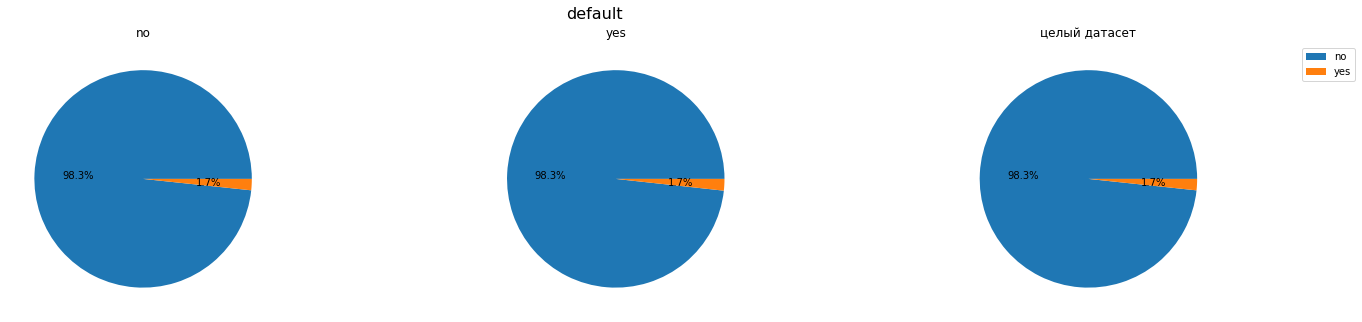

In [9]:
viz.plot_pies(df, 'default', 'y')

## balance

Среднегодовой баланс, в евро.

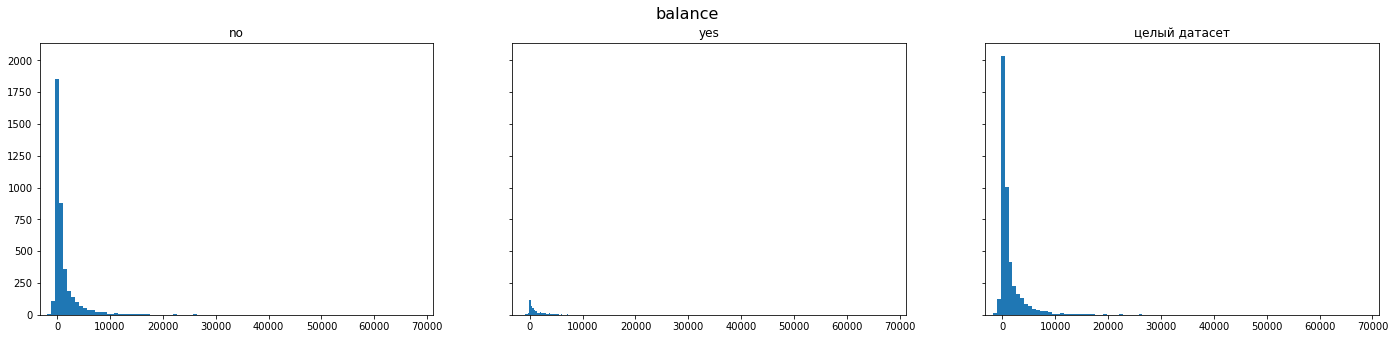

In [10]:
xlim = df['balance'].min(), df['balance'].max()
viz.plot_hists(df, 'balance', 'y', bins=100, xlim=xlim)

## housing

Есть жилищный кредит?

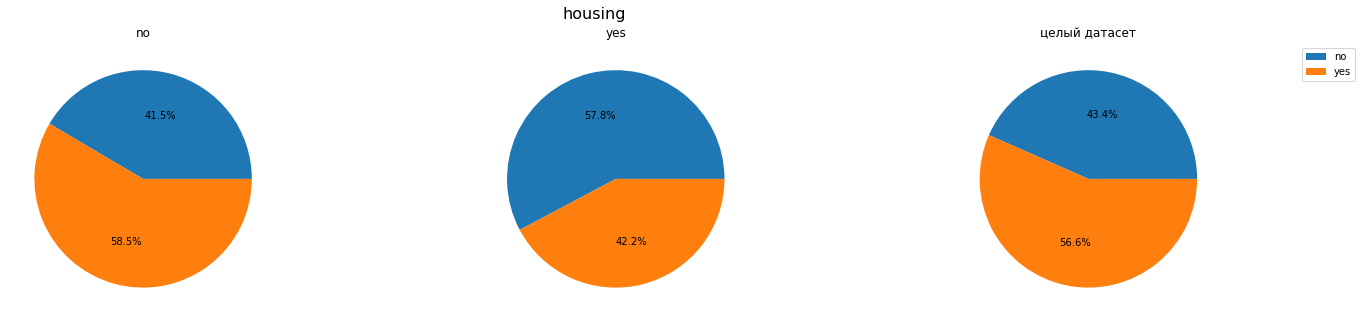

In [11]:
viz.plot_pies(df, 'housing', 'y')

## loan

Есть личный заем?

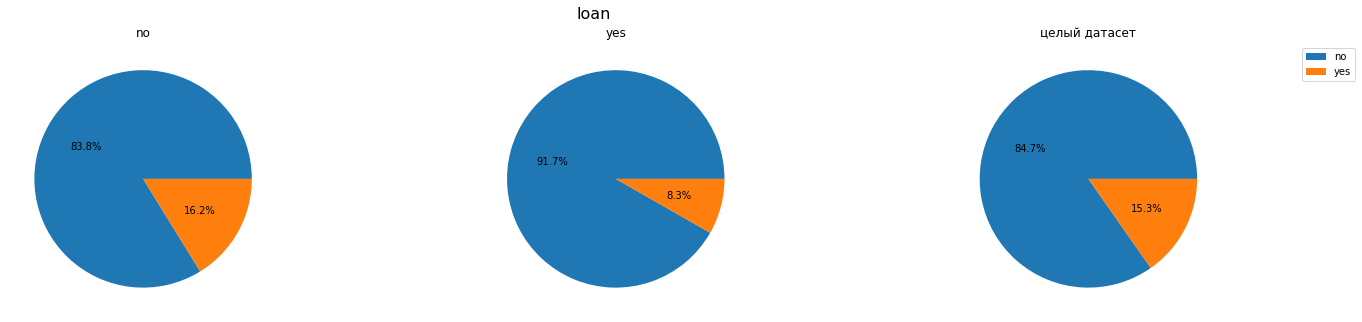

In [12]:
viz.plot_pies(df, 'loan', 'y')

## contact

Контактный вид связи.

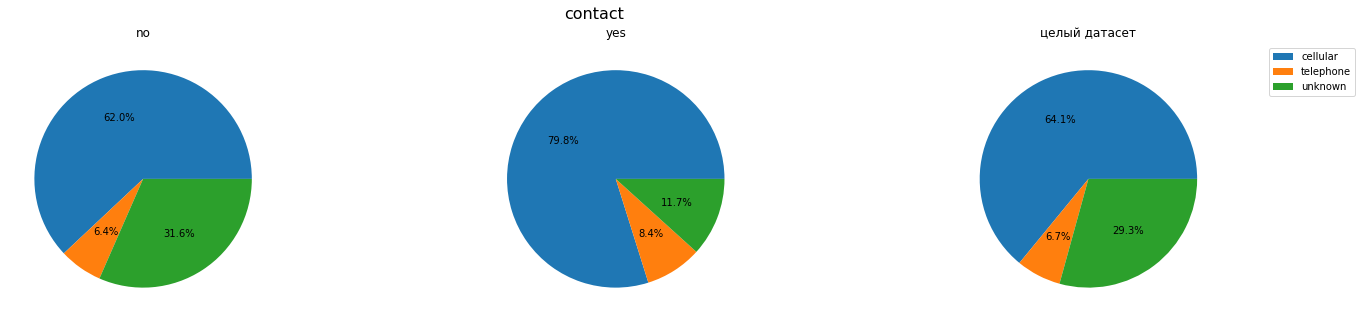

In [13]:
viz.plot_pies(df, 'contact', 'y')

## day

Последний контактный день месяца.

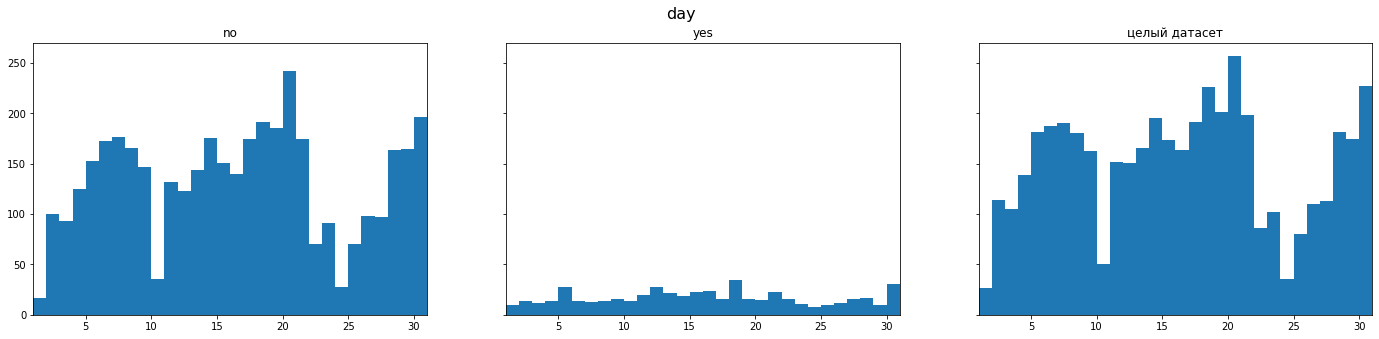

In [14]:
xlim = df['day'].min(), df['day'].max()
bins = int(df['day'].max() - df['day'].min())
viz.plot_hists(df, 'day', 'y', bins=bins, xlim=xlim)

## month

Месяц последнего контакта в году.

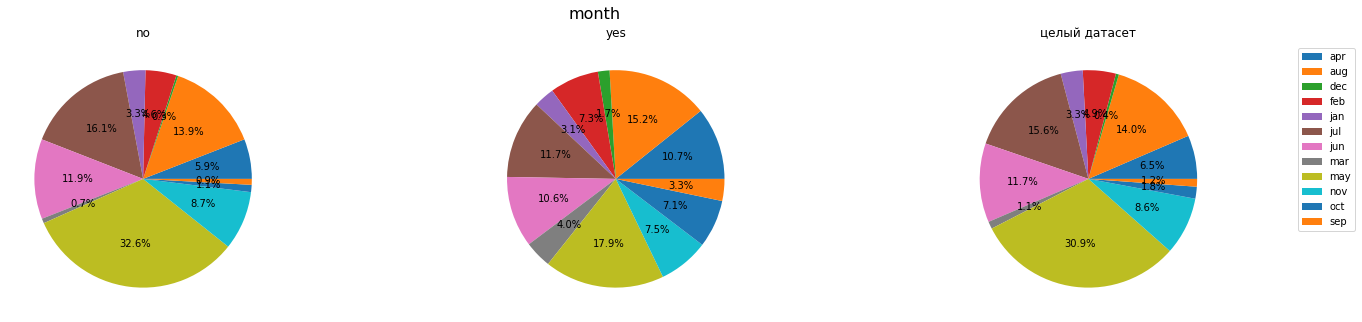

In [15]:
viz.plot_pies(df, 'month', 'y')

## duration

Продолжительность последнего контакта, в секундах.

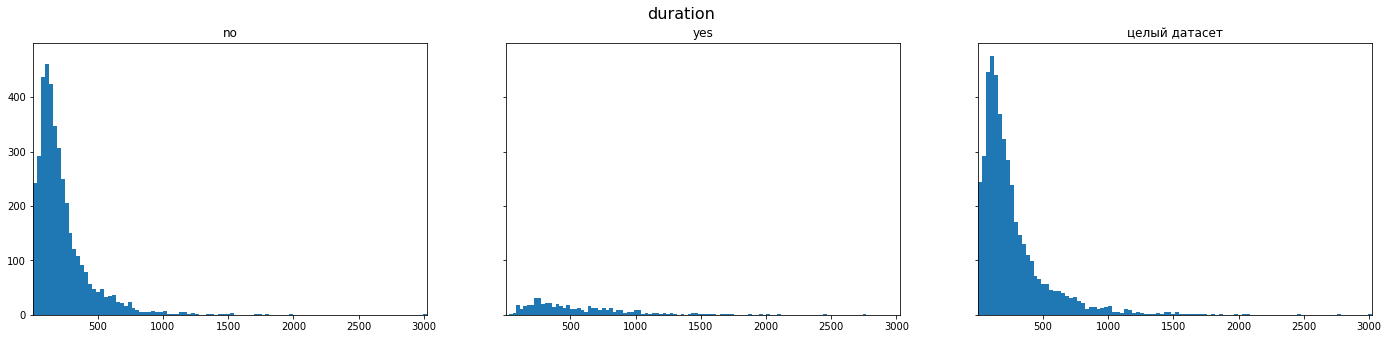

In [16]:
xlim = df['duration'].min(), df['duration'].max()
viz.plot_hists(df, 'duration', 'y', bins=100, xlim=xlim)

## campaign

Количество контактов, выполненных во время этой кампании и для этого клиента.

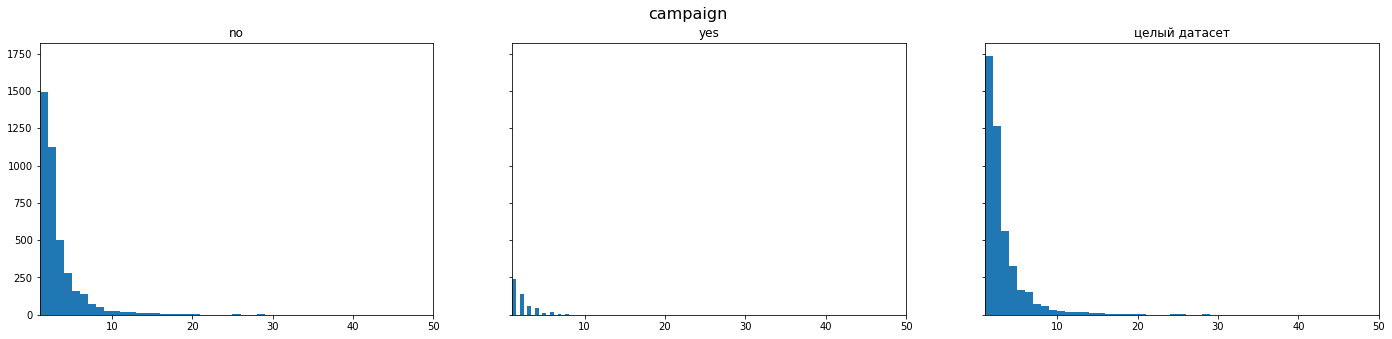

In [17]:
xlim = df['campaign'].min(), df['campaign'].max()
bins = int(df['campaign'].max() - df['campaign'].min())
viz.plot_hists(df, 'campaign', 'y', bins=bins, xlim=xlim)

## pdays

Количество дней, прошедших с момента последнего контакта с клиентом в рамках предыдущей кампании.

-1 означает, что с клиентом ранее не связывались

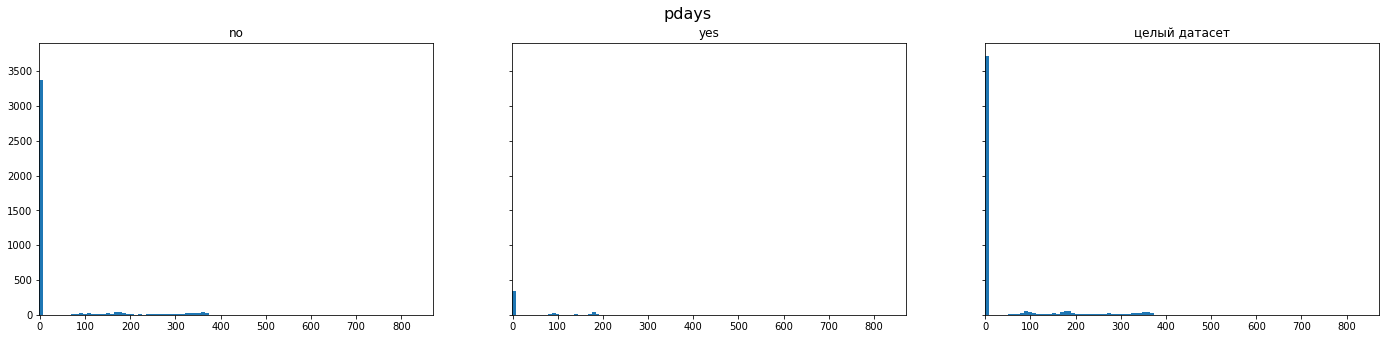

In [18]:
xlim = df['pdays'].min(), df['pdays'].max()
viz.plot_hists(df, 'pdays', 'y', bins=100, xlim=xlim)

## previous

Количество контактов, выполненных до этой кампании и для этого клиента.

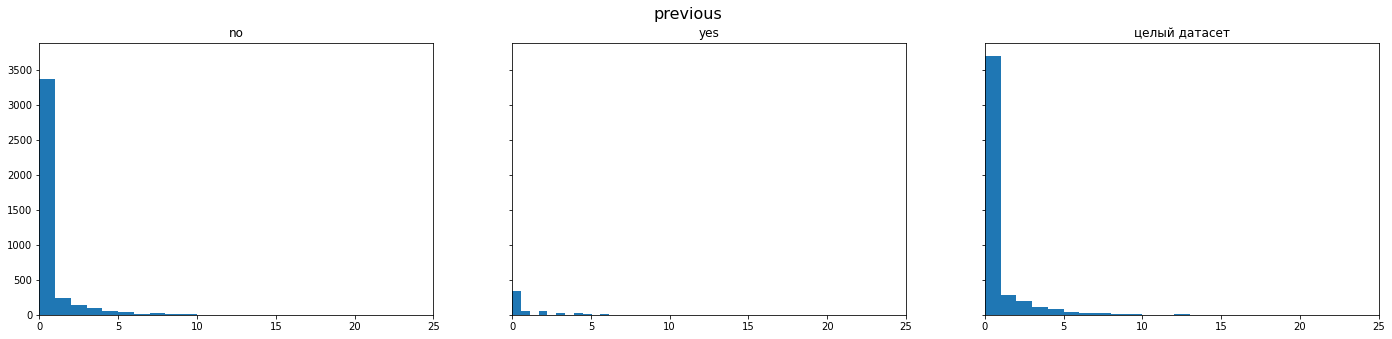

In [19]:
xlim = df['previous'].min(), df['previous'].max()
bins = int(df['previous'].max() - df['previous'].min())
viz.plot_hists(df, 'previous', 'y', bins=bins, xlim=xlim)

## poutcome

Результаты предыдущей маркетинговой кампании.

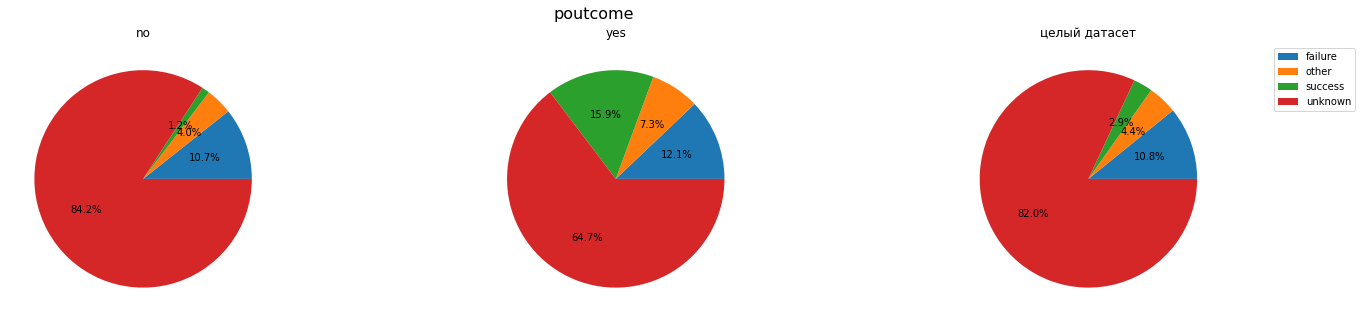

In [20]:
viz.plot_pies(df, 'poutcome', 'y')

# Диаграммы рассеяния

# Корреляция

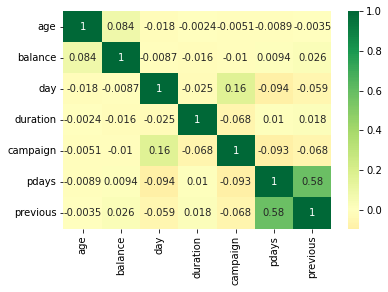

In [21]:
correlation_matrix = df[numerical_features].corr()
ax = sns.heatmap(correlation_matrix, cmap='RdYlGn', center=0, annot=True)

# Хи-квадрат

In [22]:
def contingency_table(dataframe, col1_name, col2_name):
    """Создаёт таблицу сопряжённости."""
    categories1 = list(set(dataframe[col1_name].tolist()))  # индексы
    categories2 = list(set(dataframe[col2_name].tolist()))  # колонки
    
    table = pd.DataFrame(index=categories1, columns=categories2)
    
    for cat2 in categories2:  # перебор по колонкам
        for cat1 in categories1:  # перебор по индексам
            amount = ((dataframe[col1_name] == cat1) & (dataframe[col2_name] == cat2)).sum()
            if amount <= 5:
                print('Значение в ячейке меньше 5.')
            table.loc[cat1, cat2] = amount
    
    return table

In [23]:
for feature in categorical_features + binary_features:
    observed = contingency_table(df, feature, 'y')
    chi2, p_value, dof, expected = chi2_contingency(observed)
    
    if p_value <= ALPHA:
        print(f'Статистическая взаимосвязь между признаком {feature} и ответом есть.')
        print(f'Значение x^2: {chi2}; значение p: {p_value}.')
        print('---------------------------------------------------------------------')
    else:
        print(f'Статистическая взаимосвязи между признаком {feature} и ответом нет.')
        print(f'Значение x^2: {chi2}; значение p: {p_value}.')
        print('---------------------------------------------------------------------')

Статистическая взаимосвязь между признаком job и ответом есть.
Значение x^2: 68.98828575267177; значение p: 1.9013910966626904e-10.
---------------------------------------------------------------------
Статистическая взаимосвязь между признаком marital и ответом есть.
Значение x^2: 19.03005634409817; значение p: 7.373535401823763e-05.
---------------------------------------------------------------------
Статистическая взаимосвязь между признаком education и ответом есть.
Значение x^2: 15.236579554873757; значение p: 0.001625240003630989.
---------------------------------------------------------------------
Статистическая взаимосвязь между признаком contact и ответом есть.
Значение x^2: 87.86985650165812; значение p: 8.30430129641147e-20.
---------------------------------------------------------------------
Статистическая взаимосвязь между признаком month и ответом есть.
Значение x^2: 250.50006340911358; значение p: 2.195354833570811e-47.
------------------------------------------------